In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
import seaborn as sb

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
y_train=df_train.Survived

In [4]:
df_train.drop('Survived', axis=1, inplace=True)

In [5]:
df_train.columns==df_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [6]:
df_train['is_test']=0

In [7]:
df_test['is_test']=1

In [8]:
df1=pd.concat([df_test,df_train])

In [9]:
df1['isMale']=df1.Sex.replace({'male':1,'female':0})

In [10]:
df1['is_Miss']=df1.Name.str.contains('Miss').astype(int)
df1['is_Master']=df1.Name.str.contains('Master').astype(int)
df1['is_Mr']=df1.Name.str.contains(r'(?:\s|^)Mr.(?:\s|$)').astype(int)
df1['is_Mrs']=df1.Name.str.contains(r'(?:\s|^)Mrs.(?:\s|$)').astype(int)

In [11]:
df1['Cabin_']=df1.Cabin.str[0]

In [12]:
df1['is_Family']=df1['SibSp'].loc[(df1['SibSp']>0) & df1['SibSp']<3].astype(bool).astype(int)

In [13]:
#df1['is_Family']=(df1.SibSp>1).astype(int)

In [14]:
df1_1=pd.get_dummies(df1,columns=['Pclass','Embarked', 'Cabin_'])

In [15]:
df1_1.drop(['PassengerId', 'Name','Cabin', 'Ticket', 'Sex', 'SibSp'], inplace=True, axis=1)

In [16]:
df1_1['Fare'].fillna(df1_1['Fare'].loc[(df1_1['Pclass_3']==1) & (df1_1['Age']>50)].mean(), inplace=True)

Предсказываем возраст.

In [17]:
df2_train_Age=df1_1[df1_1['Age'].notnull()].drop(['is_test'], axis=1)

In [18]:
df2_test_Age=df1_1[df1_1['Age'].isnull()].drop(['Age','is_test'], axis=1)

In [19]:
y_Age=df2_train_Age.Age

In [20]:
y_Age[y_Age==0]

Series([], Name: Age, dtype: float64)

In [21]:
df2_train_Age.drop(['Age'], axis=1, inplace=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_Age_train, X_Age_val, Y_Age_train, Y_Age_val=train_test_split(df2_train_Age, y_Age)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr=LinearRegression()

In [26]:
lr.fit(X_Age_train,Y_Age_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
Y_Age_val_pred=lr.predict(X_Age_val)

In [28]:
lr.fit(df2_train_Age, y_Age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
Age_pred=lr.predict(df2_test_Age)

In [30]:
df1_1.Age[df1_1.Age.isnull()==True]=(pd.Series(Age_pred))

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
df1_1.Age[df1_1.Age.isnull()==True].replace(pd.Series(Age_pred))

Series([], Name: Age, dtype: float64)

In [32]:
x_train=df1_1[df1_1.is_test==0].drop('is_test', axis=1)
x_test=df1_1[df1_1.is_test==1].drop('is_test', axis=1)

In [33]:
columns=x_train.columns

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [37]:
x_train_sc=scaler.transform(x_train)
x_train_sc=pd.DataFrame(x_train_sc, columns=columns)

In [38]:
x_train_sc.head()

,Age,Parch,Fare,isMale,is_Miss,is_Master,is_Mr,is_Mrs,is_Family,Pclass_1,...,Embarked_Q,Embarked_S,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T
0,-0.569879,-0.473674,-0.502445,0.737695,-0.506655,-0.216803,0.850532,-0.403962,1.465746,-0.565685,...,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
1,0.612686,-0.473674,0.786845,-1.355574,-0.506655,-0.216803,-1.175735,2.475480,1.465746,1.767767,...,-0.307562,-1.614710,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
2,-0.274238,-0.473674,-0.488854,-1.355574,1.973729,-0.216803,-1.175735,-0.403962,-0.682247,-0.565685,...,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
3,0.390955,-0.473674,0.420730,-1.355574,-0.506655,-0.216803,-1.175735,2.475480,1.465746,1.767767,...,-0.307562,0.619306,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
4,0.390955,-0.473674,-0.486337,0.737695,-0.506655,-0.216803,0.850532,-0.403962,-0.682247,-0.565685,...,-0.307562,0.619306,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352


In [39]:
x_test_sc=scaler.transform(x_test)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca=PCA(n_components=2)

In [42]:
ppl=pca.fit_transform(x_train_sc)

In [43]:
pca.explained_variance_ratio_.sum()

0.2714487437204654

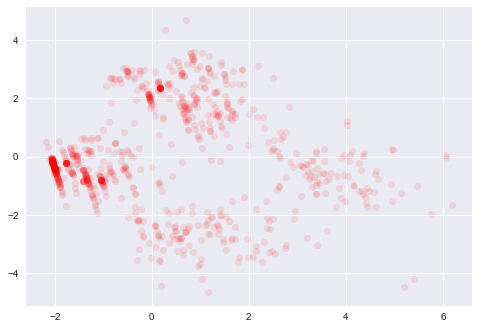

In [44]:
pyplot.plot(ppl[:,0],ppl[:,1], 'ro', alpha=0.1);

In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans=KMeans(n_clusters=7)

In [47]:
kmeans.fit(x_train_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
cluster_labels=kmeans.predict(x_train_sc)

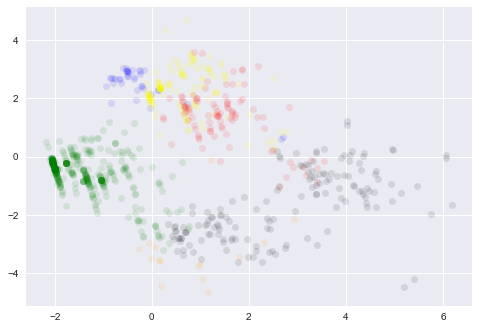

In [49]:
for i, color in zip(range(7),{'blue','red','green','black','orange','yellow'}):
    t=ppl[cluster_labels==i]
    pyplot.plot(t[:,0], t[:,1], 'ro', alpha=0.1, c=color)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train_fin, x_cv, y_train_fin, y_cv=train_test_split(x_train_sc, y_train, test_size=0.2)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [53]:
depth=np.arange(1,10)
grid={'max_depth':depth}
gridsearch=GridSearchCV(DecisionTreeClassifier(),grid,scoring='accuracy', cv=5)

In [54]:
gridsearch.fit(x_train_fin, y_train_fin)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [55]:
sorted(gridsearch.grid_scores_, key=lambda x: -x.mean_validation_score)

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80618, std: 0.01427, params: {'max_depth': 3},
 mean: 0.80056, std: 0.03798, params: {'max_depth': 8},
 mean: 0.79635, std: 0.03172, params: {'max_depth': 5},
 mean: 0.79635, std: 0.02297, params: {'max_depth': 6},
 mean: 0.79213, std: 0.04048, params: {'max_depth': 4},
 mean: 0.79213, std: 0.02970, params: {'max_depth': 7},
 mean: 0.79073, std: 0.01608, params: {'max_depth': 1},
 mean: 0.78371, std: 0.04957, params: {'max_depth': 9},
 mean: 0.77809, std: 0.02353, params: {'max_depth': 2}]

C:\Users\mrasskazov\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


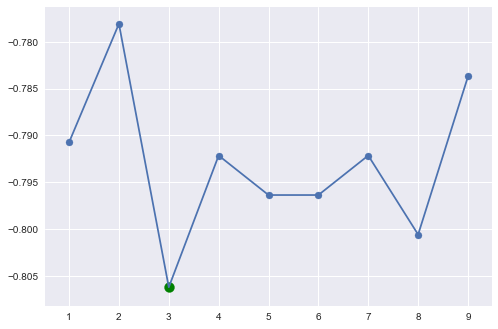

In [56]:
scores=[-x.mean_validation_score for x in gridsearch.grid_scores_]
pyplot.plot(depth, scores)
pyplot.scatter(depth, scores)
best_point=np.argmin(scores)
pyplot.scatter(depth[best_point], scores[best_point],c='g', s=100);

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
dt=DecisionTreeClassifier(max_depth=3)

In [59]:
dt.fit(x_train_fin, y_train_fin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
y_cv_pred=dt.predict(x_cv)

In [61]:
accuracy_score(y_cv, y_cv_pred)

0.82122905027932958

In [62]:
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [63]:
prediction=dt.predict(x_test_sc)

In [64]:
submission='PassengerId,Survived\n'
submission+="\n".join(['{},{}'.format(pid,prediction) for pid, prediction in zip(df_test.PassengerId,prediction)])

In [65]:
with open ('submission.txt', 'w') as file:
    file.write(submission)

In [66]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [67]:
from sklearn.preprocessing import LabelEncoder as le

In [68]:
get_tree_dot_view(dt, list(x_train_sc.columns))

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="is_Mr <= -0.1626\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.1027\ngini = 0.4217\nsamples = 374\nvalue = [113, 261]", fillcolor="#399de591"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="isMale <= -0.3089\ngini = 0.2094\nsamples = 202\nvalue = [24, 178]", fillcolor="#399de5dd"] ;
1 -> 2 ;
3 [label="Age <= -2.0117\ngini = 0.1003\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
2 -> 3 ;
4 [label="Pclass_1 <= 0.601\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
4 -> 6 ;
7 [label="Fare <= -0.0674\ngini = 0.0907\nsamples = 168\nvalue = [8, 160]", fillcolor="#399de5f2"] ;
3 -> 7 ;
8 [label="gini = 0.1823\nsamples = 69\nvalue = [7, 62]